In [8]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


<Figure size 1440x432 with 0 Axes>

In [9]:
%matplotlib inline

from gEconpy.classes.model import gEconModel

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs
from src.filtering_sampling import solve_updated_mod

import numpy as np
import pandas as pd

import os
from itertools import chain

from config import plt_config
plt.rcParams.update(plt_config)

globals 

In [10]:
plot_vars = ['A', 'Y', 'C', 'I', 'L', 'w', 'r', 'pi', 'lambda']

load model

In [11]:
from config import mod4_params, mod4_priors, mod5_params, mod5_priors
mods = {
    'mod4_rbc_vanilla': {'params': mod4_params,
                         'priors': mod4_priors},
    'mod4_rbc_seplabour': {'params': mod4_params,
                           'priors': mod4_priors},
    'mod5_nk_vanilla': {'params': mod5_params,
                            'priors': mod5_priors},
    'mod5_nk_capital': {'params': mod5_params,
                            'priors': mod5_priors},
}

# load model
for item in mods.keys():
    mods[item]['mod'] = gEconModel(os.path.join(MODEL_DIR, f'{item}.gcn'), verbose=False)

# solve model
for item in mods.keys():
    _, mods[item]['mod'] = solve_updated_mod(mods[item]['mod'], verbose=False)
    assert _ == True

covariance

In [12]:
# _ = plot_vars.copy()
# _.append('pi')
# for key in mods.keys():
#     sigma = mods[key]['mod'].compute_stationary_covariance_matrix()
#     mods[key]['cov_matrix'] = sigma
#     if 'nk' in key:
#         plt.figure(figsize=(5, 4))
#         sns.heatmap(sigma.loc[_, _], cmap='winter', annot=True, annot_kws={"fontsize":7})
#         plt.title(key, size=8)
#         plt.tight_layout()
        
#         print(sigma.loc['pi', 'Y'])

IRF

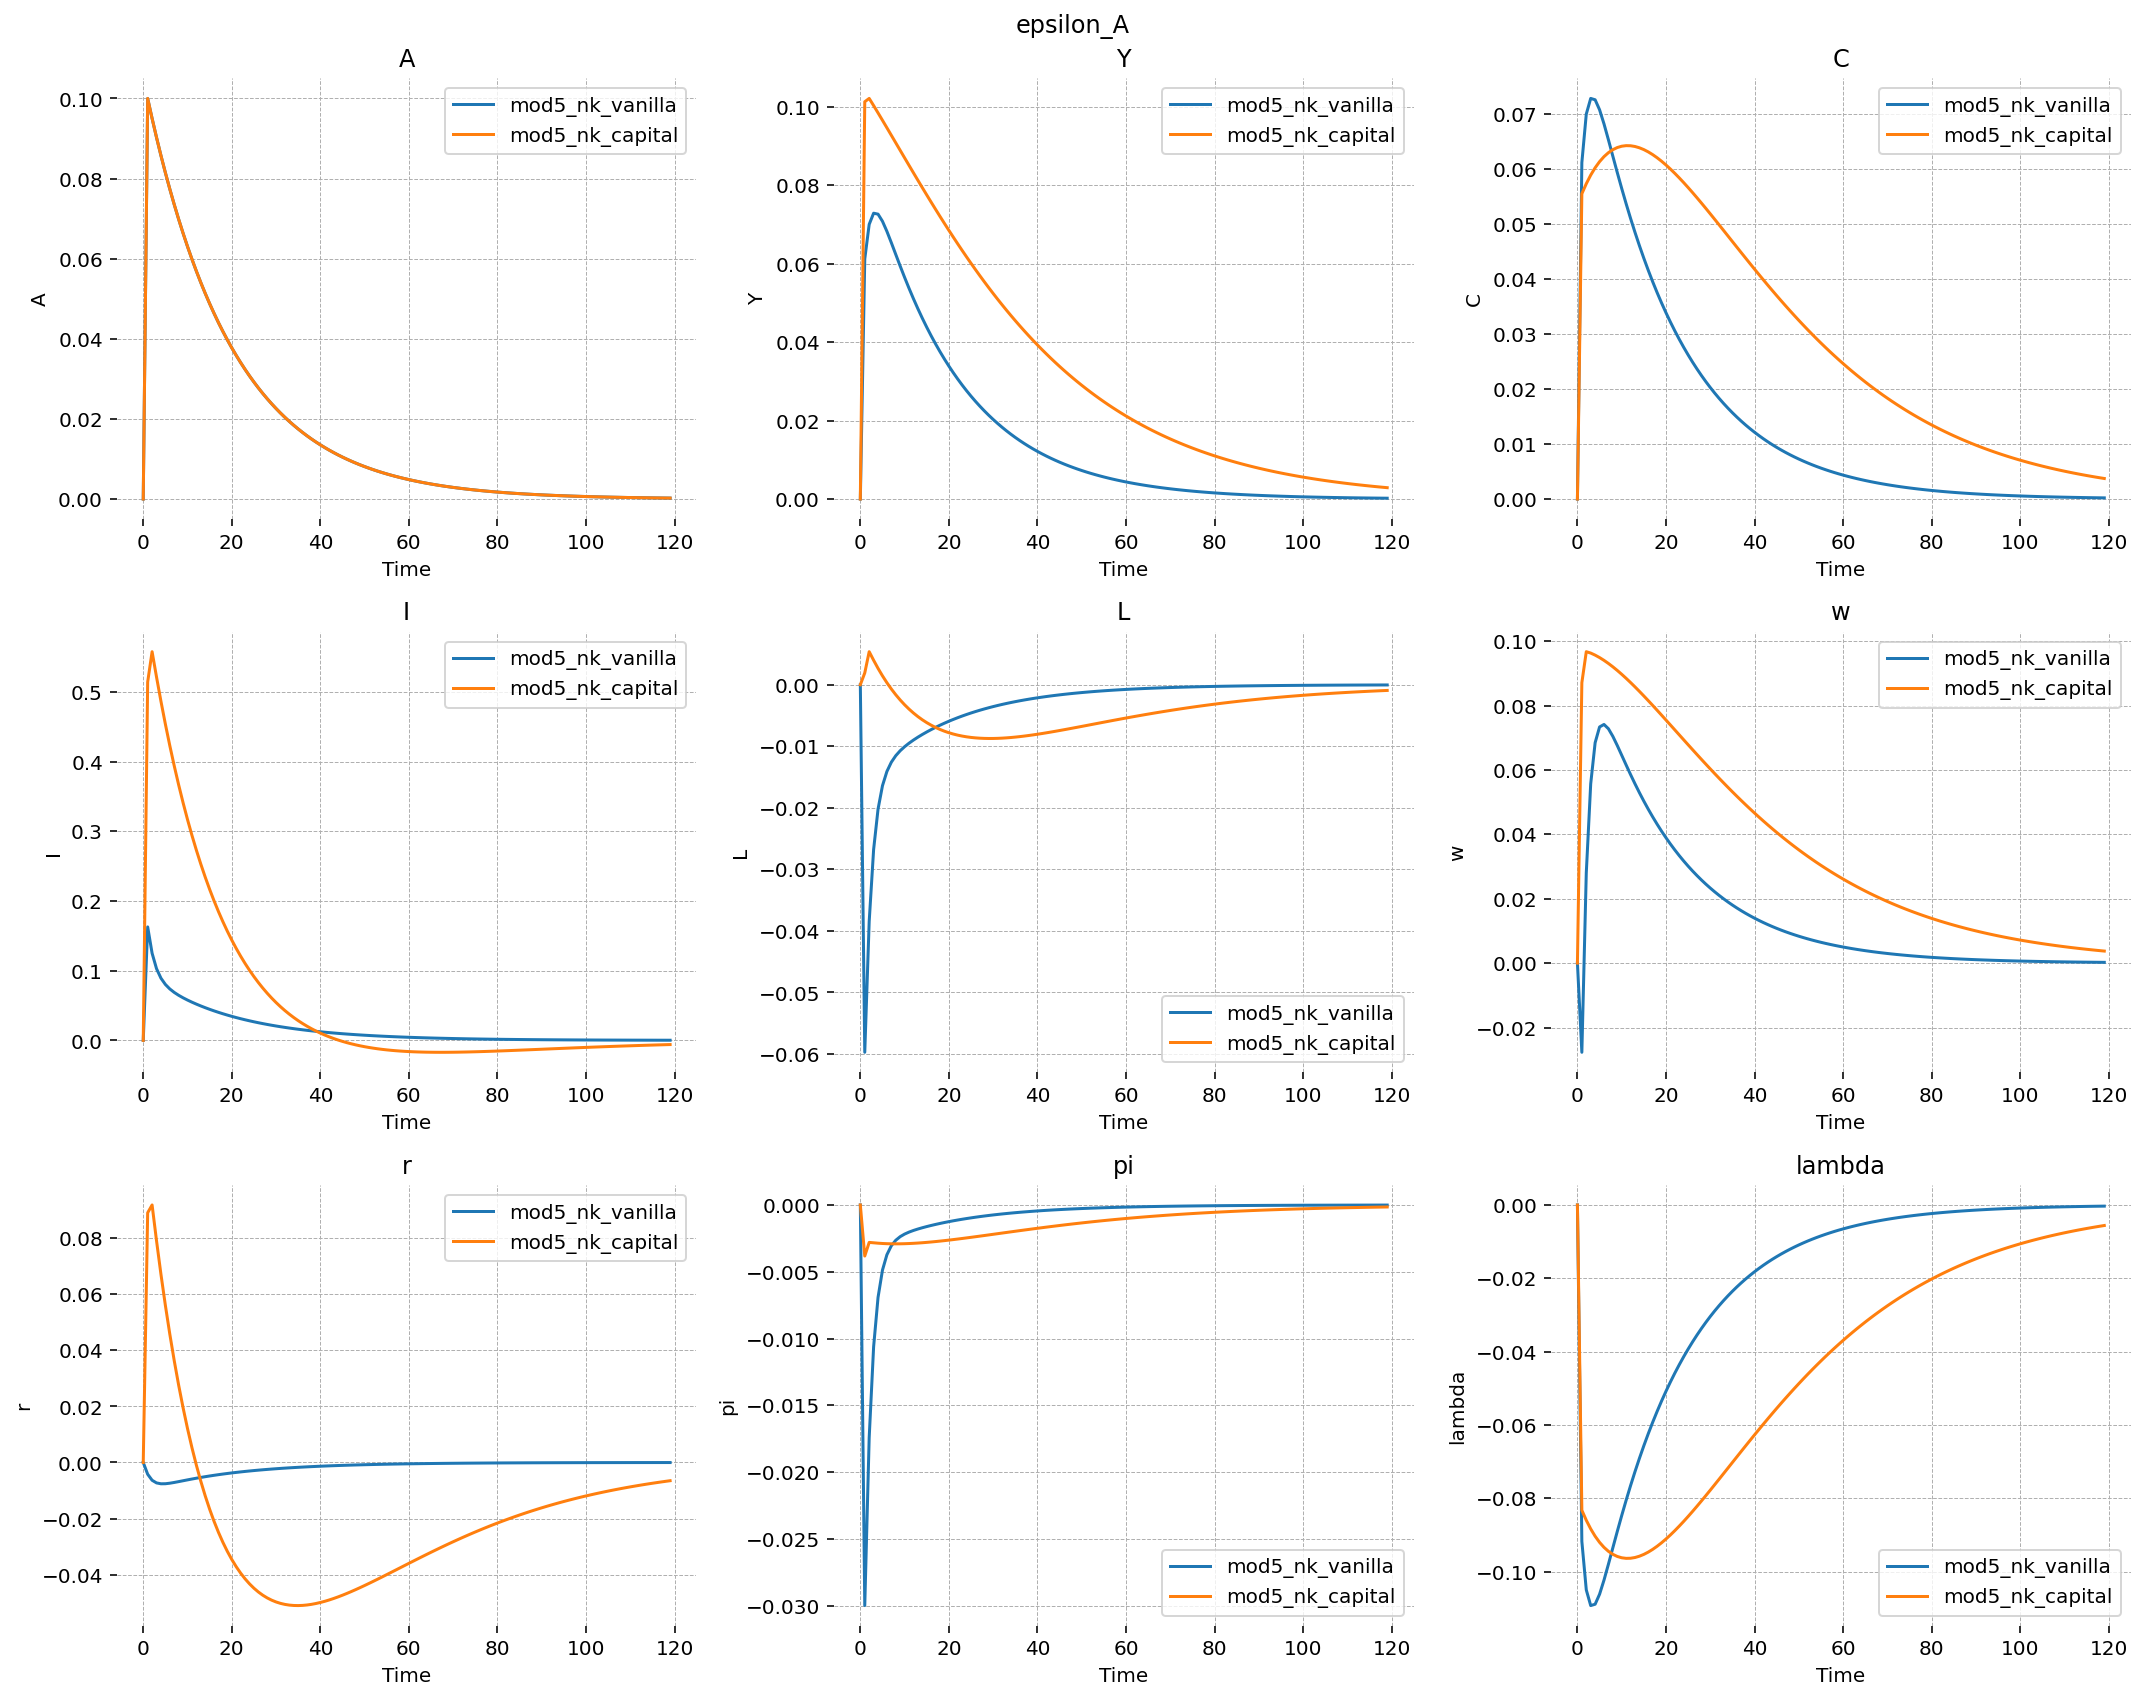

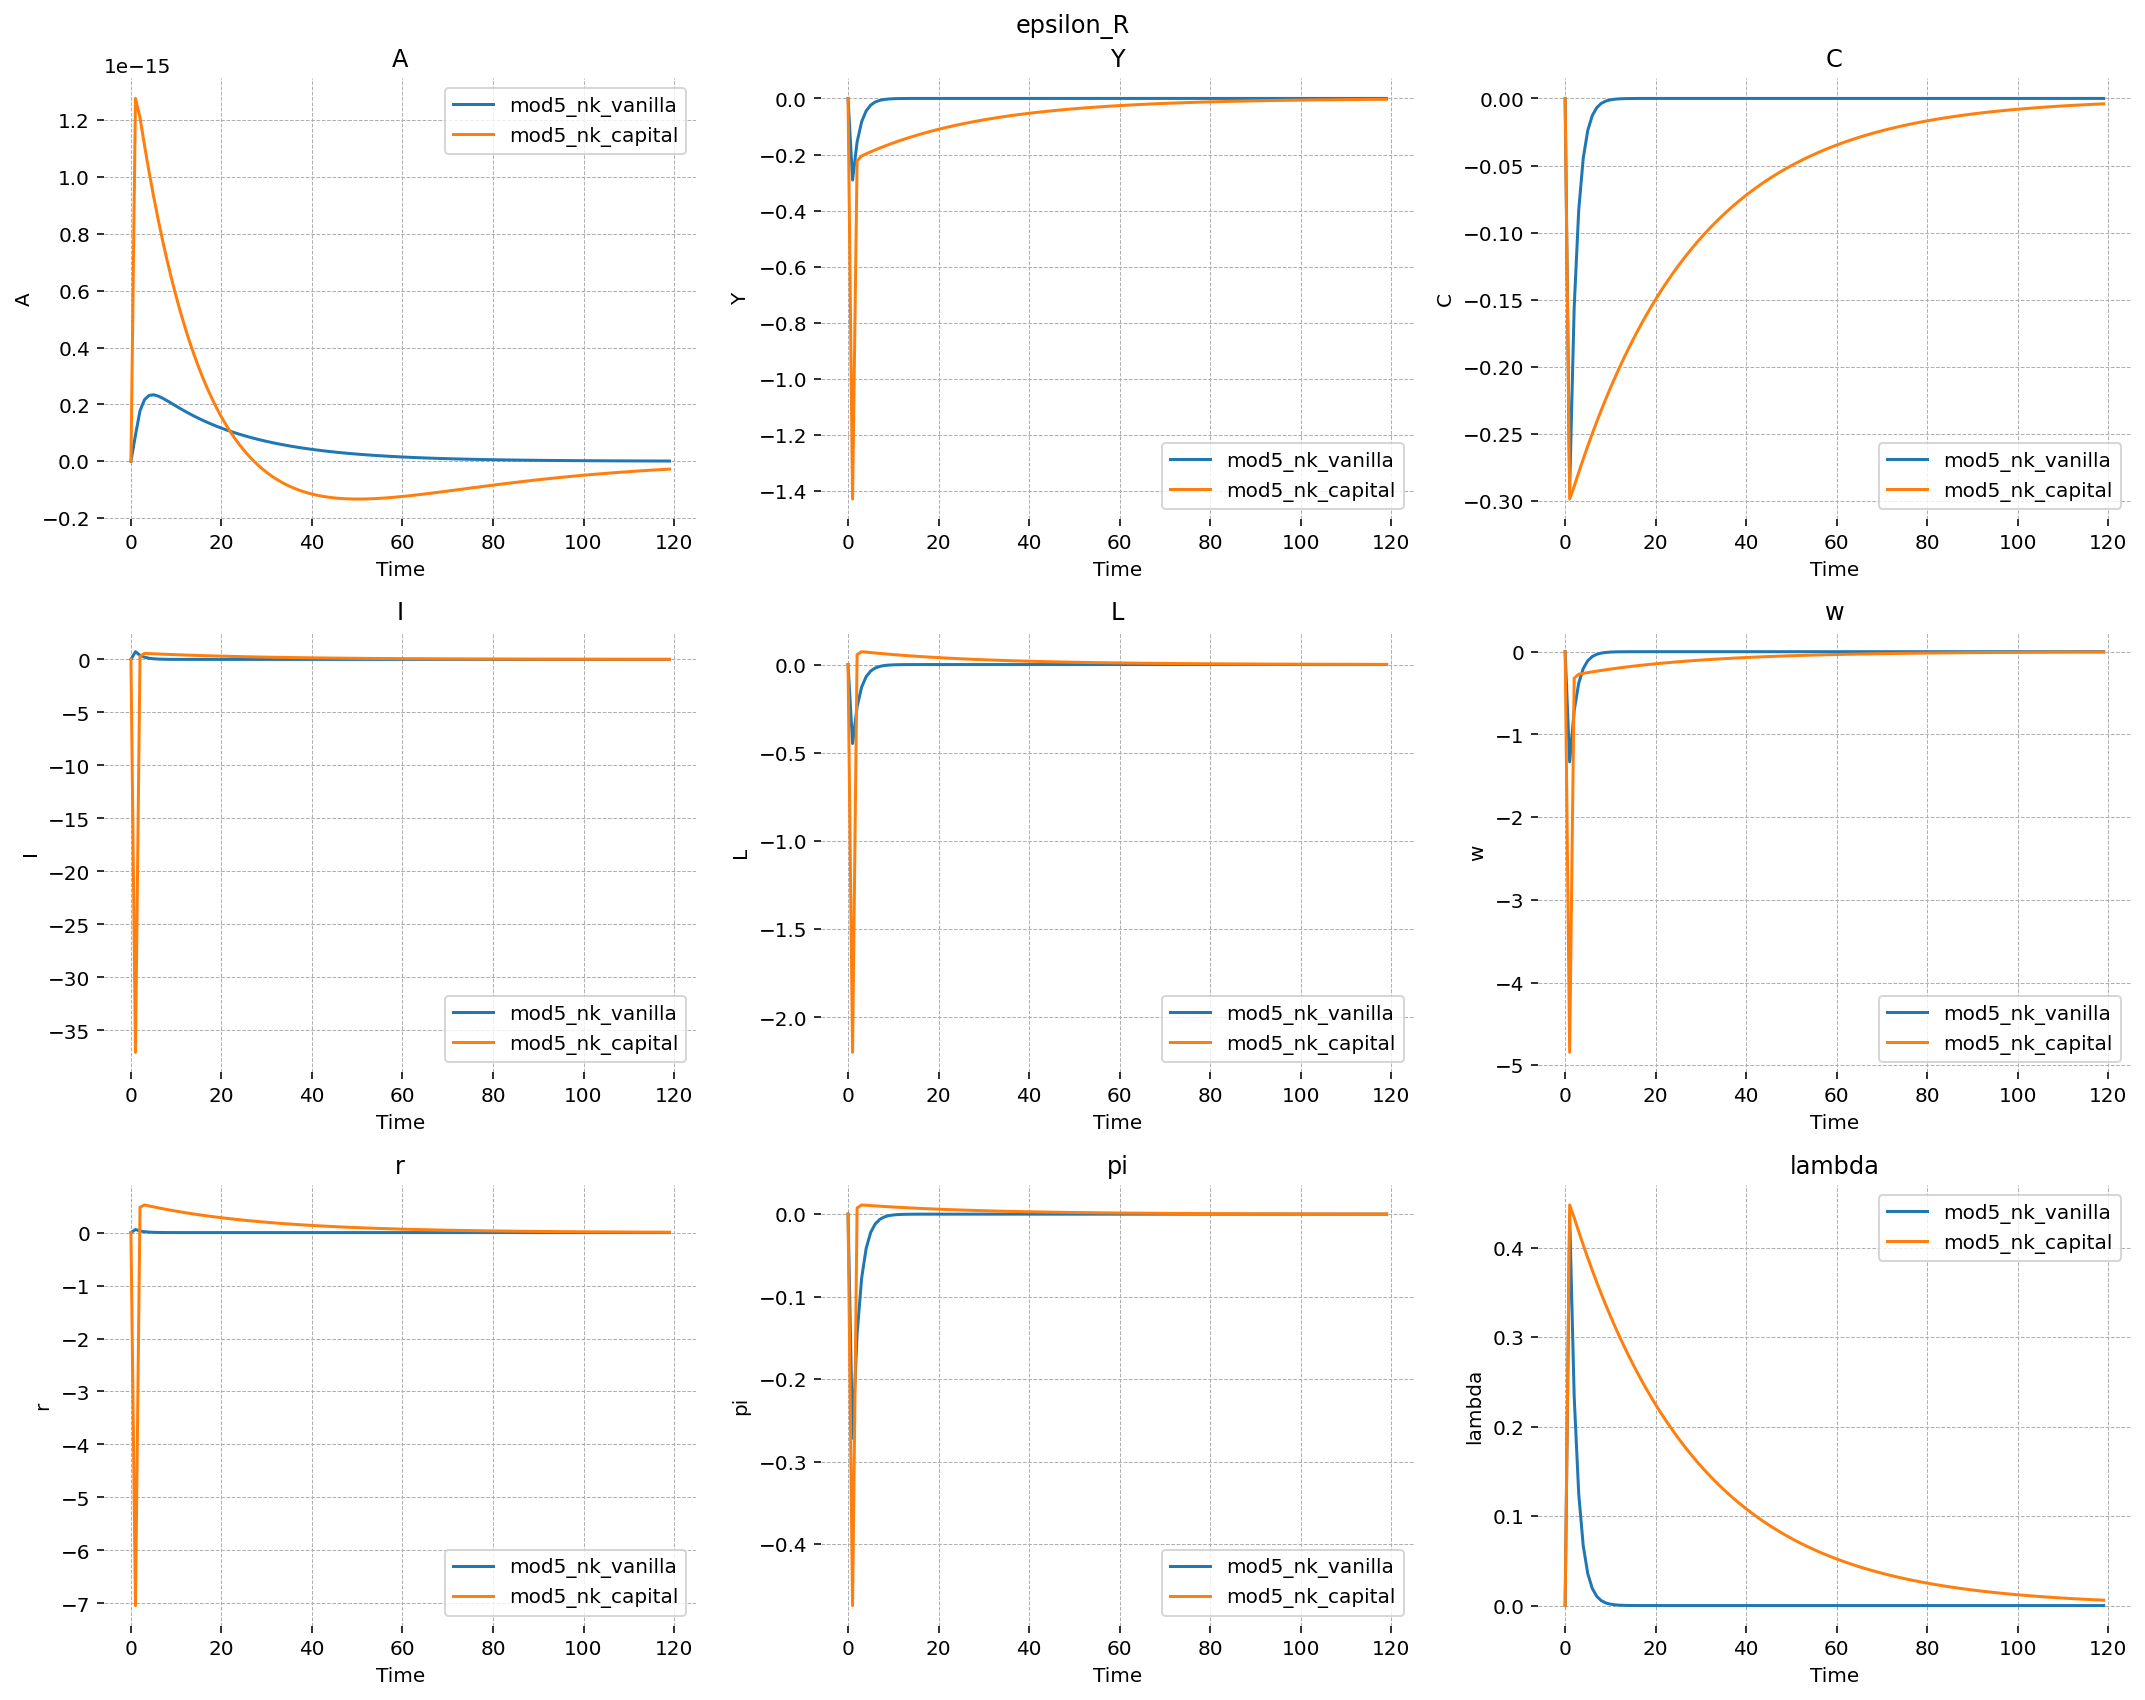

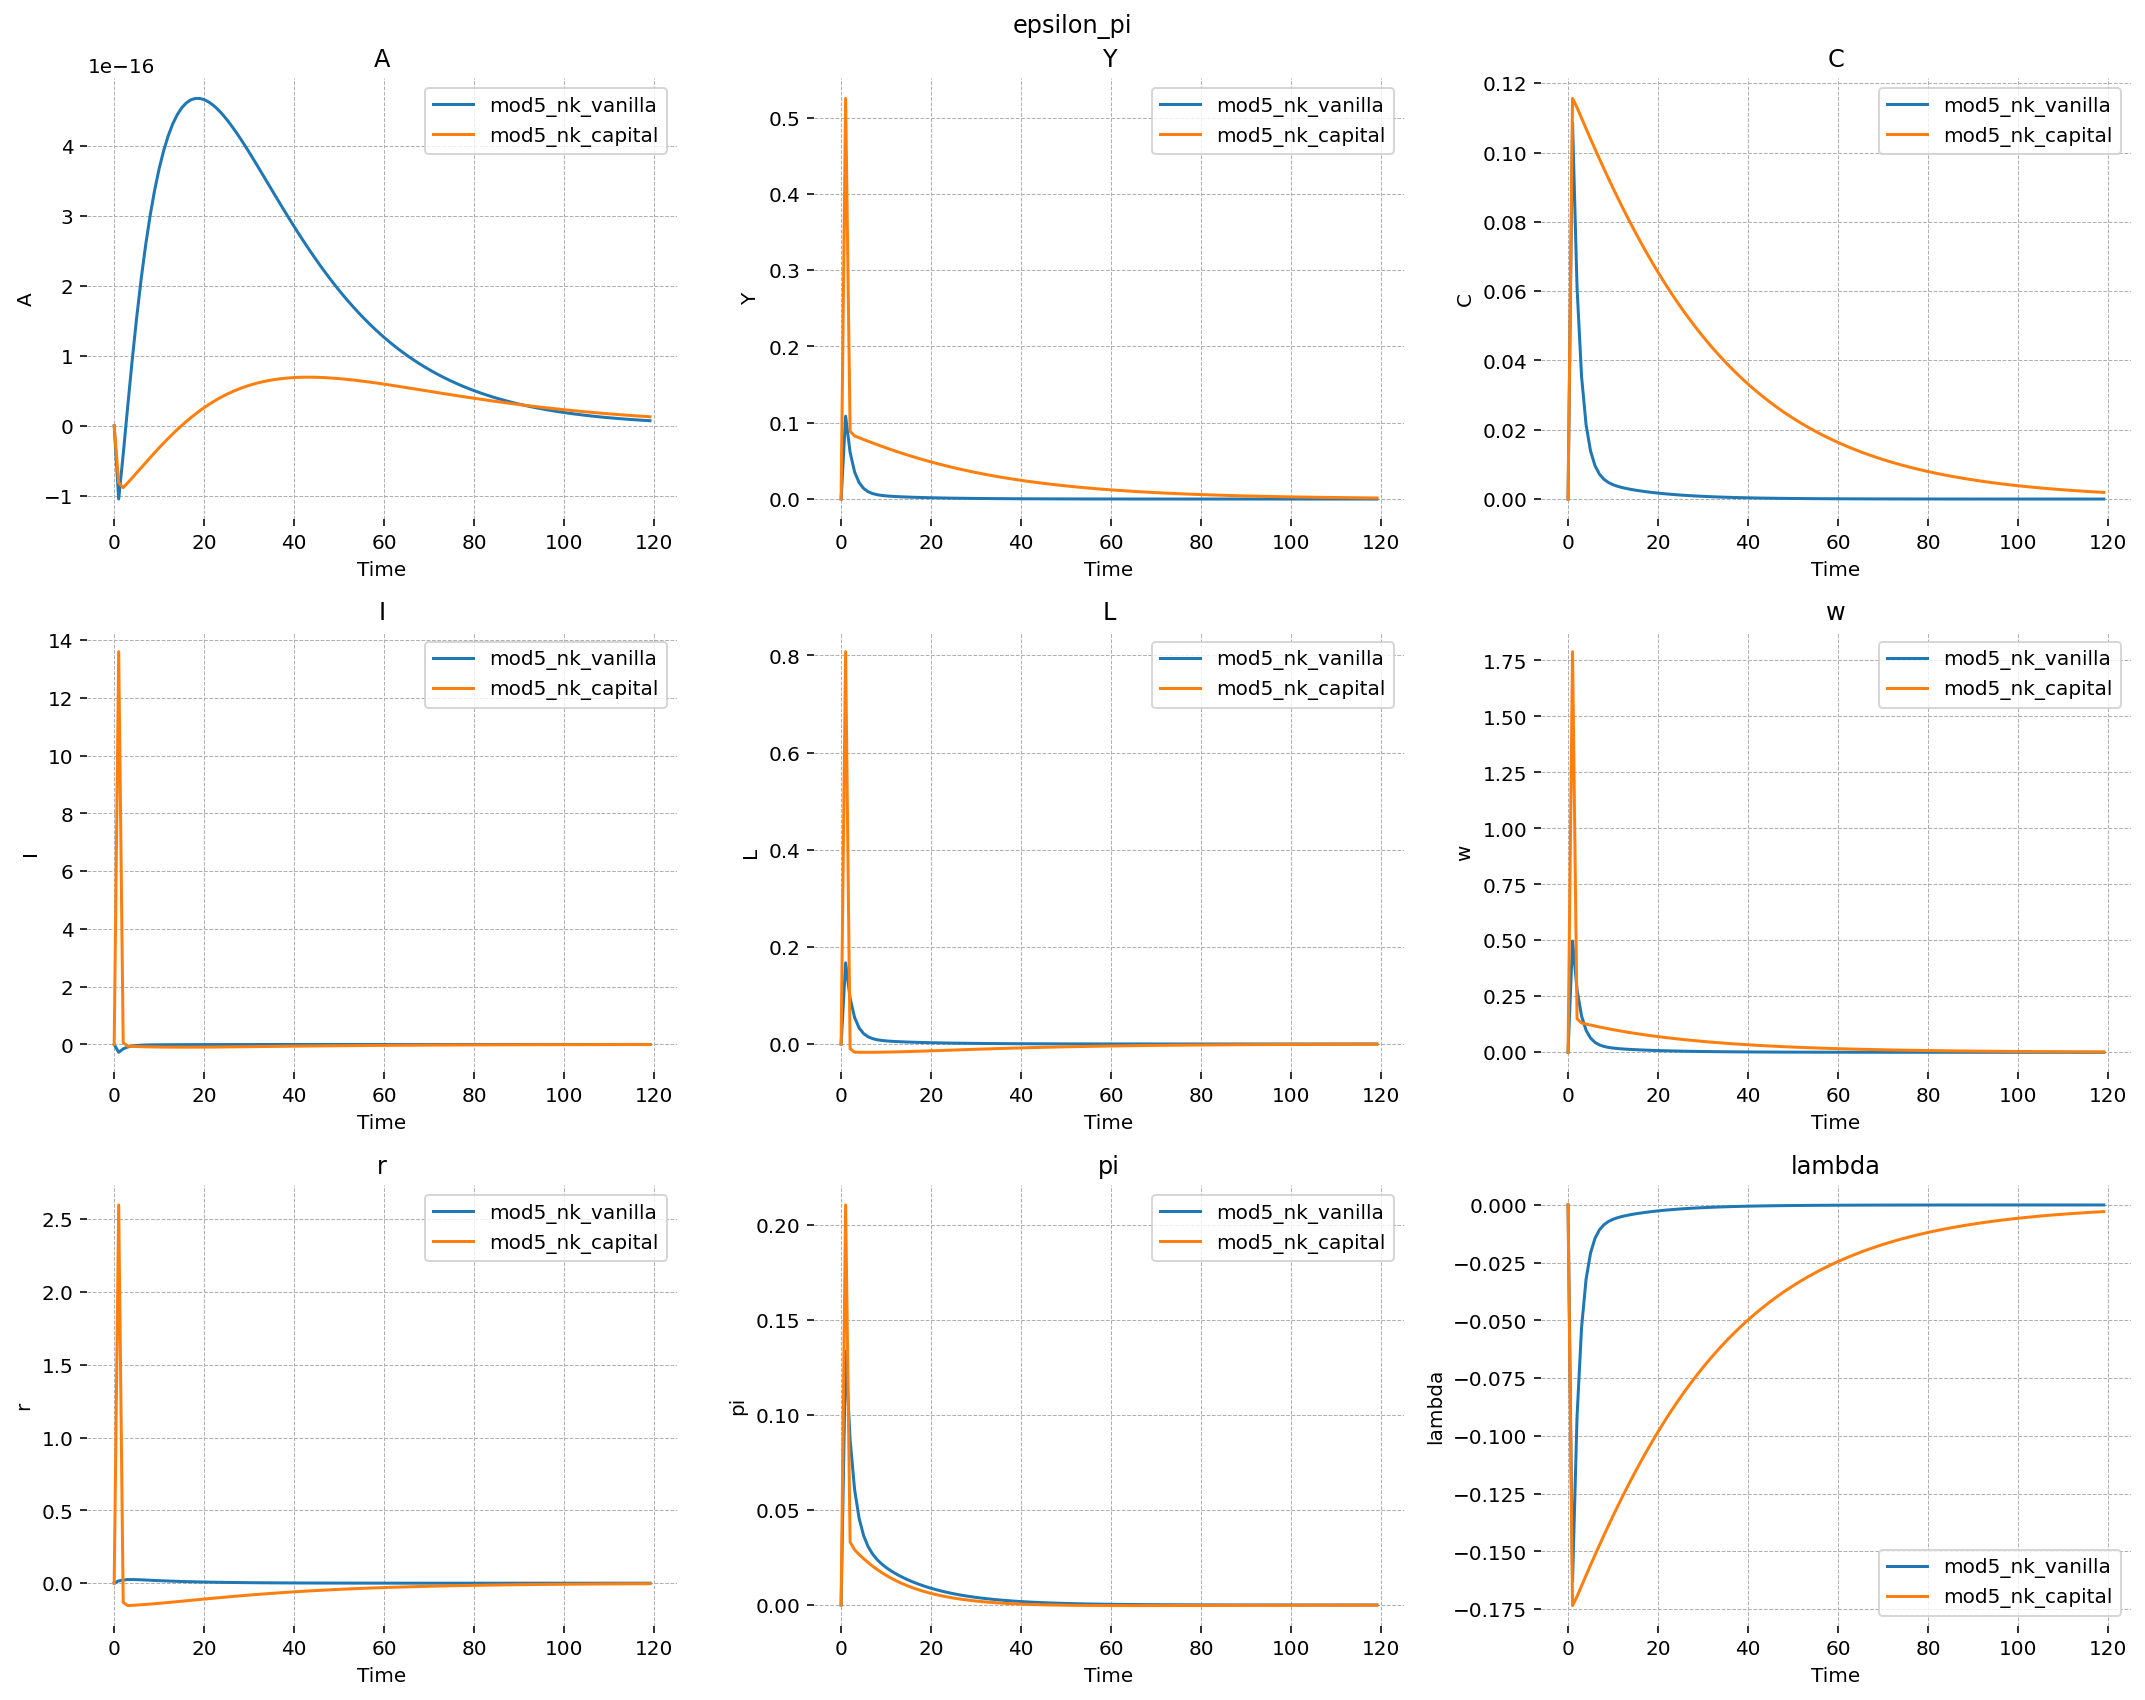

In [13]:
shock_size = .1
sim_length = 120

# get irf for each model
for key in mods.keys():
    mods[key]['irf'] = mods[key]['mod'].impulse_response_function(simulation_length=sim_length, shock_size=shock_size)

# set plotting shock
shocks = ['epsilon_A', 'epsilon_R', 'epsilon_pi']
p_vars = plot_vars.copy()
for shock in shocks:
    irfs_list = []
    legend = []
    p_vars = plot_vars.copy()
    for key in ['mod5_nk_vanilla', 'mod5_nk_capital']:
        try:
            irfs_list.append(mods[key]['irf'].unstack().loc[:, shock].unstack().copy())
            legend.append(key)
            if 'rbc' in key: 
                p_vars = [item for item in p_vars if item != 'pi']
        except KeyError:
            continue

    # plot shocks
    plot_dfs([df[p_vars] for df in irfs_list],
             sns.lineplot,
             figsize=(15, 4), 
             fig_title=shock,
             legend=legend
            )